# Проект "Определение перспективного тарифа для телеком компании"

## Описание проекта

### Данные, с которыми работаем:
1. Мы работаем с данными пользователей оператора сотовой связи: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений отправили.

### Задачи проекта:
- Проанализировать поведение клиентов разных тарифов;
- На основе предварительного анализа тарифов на небольшой выборке клиентов определить, какой тариф приносит компании больше денег, чтобы в дальнейшем скорректировать рекламный бюджет.

### План проекта:
- Изучение общей информации;
- Подготовка данных к исследованию;
- Анализ данных;
- Проверка гипотез.

## Шаг 1. Изучение общей информации

- Импортируем все необходимые для работы библиотеки;
- Импортируем файлы с данными;
- Исследуем каждый файл на предмет наличия пропусков и правильности типа данных с помощью метода info(), также посмотрим, что из себя представляют данные с помощью метода sample().

In [91]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
from pymystem3 import Mystem 
m = Mystem()
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
from matplotlib.ticker import MaxNLocator
import math
from scipy.stats import ttest_ind
from scipy import stats as st
from IPython.display import display

In [92]:
data_calls = pd.read_csv('/datasets/calls.csv')
data_internet = pd.read_csv('/datasets/internet.csv', index_col=0)
data_messages = pd.read_csv('/datasets/messages.csv')
data_tariffs = pd.read_csv('/datasets/tariffs.csv')
data_users = pd.read_csv('/datasets/users.csv')
pd.set_option('display.max_columns', 100)

In [93]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [94]:
data_calls.sample(5)

,id,call_date,duration,user_id
34948,1086_497,2018-09-16,4.30,1086
4750,1012_224,2018-06-14,0.00,1012
177336,1438_13,2018-11-13,14.88,1438
54317,1135_610,2018-04-24,8.55,1135
72104,1179_376,2018-10-26,23.93,1179


In [95]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


In [96]:
data_internet.sample(5)

,id,mb_used,session_date,user_id
14586,1051_200,0.00,2018-08-13,1051
113718,1384_428,426.30,2018-10-21,1384
36376,1126_323,383.36,2018-01-31,1126
78264,1263_335,415.24,2018-09-06,1263
10712,1036_142,0.00,2018-08-05,1036


Сделано

In [97]:
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [98]:
data_messages.sample(5)

,id,message_date,user_id
76511,1324_194,2018-06-07,1324
119717,1484_238,2018-10-03,1484
79596,1332_216,2018-07-21,1332
87938,1366_197,2018-11-21,1366
3619,1014_236,2018-08-19,1014


In [99]:
data_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [100]:
data_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [101]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [102]:
data_users.sample(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
39,1039,40,NaN,Ярославль,Агнесса,Андреенко,2018-06-21,ultra
227,1227,66,NaN,Санкт-Петербург,Раиса,Калинина,2018-01-09,smart
375,1375,53,NaN,Пенза,Мария,Акимычева,2018-01-04,ultra
492,1492,63,NaN,Санкт-Петербург,Руслана,Артёменко,2018-06-26,smart
57,1057,43,NaN,Москва,Динара,Дьячкова,2018-03-12,ultra


#### Вывод 1 этапа:
1. Необходимо изменить тип переменных:
 - call_date на datetime64
 - message_date на datetime64
 - churn_date на datetime64
 - reg_date на datetime64
 - session_date на datetime64
 
2. Были обнаружены пропуски в столбцах:
 - churn_date, но мы знаем, что если данные в этом столбце пропущены, значит тариф еще действовал на момент выгрузки данных, поэтому пропуски в этом столбце мы оставим.
3. Категориальные переменные записаны буквами в разных регистрах. Чтобы исключить возможность ошибки в написании таких данных, необходимо будет перевести все в строчный регистр.

# Шаг 2. Подготовка данных к исследованию

### I. Приведем данные к нужным типам.

In [103]:
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')

In [104]:
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%d')

In [105]:
data_users['churn_date'] = pd.to_datetime(data_users['churn_date'], format='%Y-%m-%d')

In [106]:
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format='%Y-%m-%d')

In [107]:
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')

In [108]:
for element in ['city', 'first_name', 'last_name','tariff']:
    data_users[element] = data_users[element].str.lower()

### II. Найдем и исправим ошибки в данных.

Изучим параметры каждого датасета через метод describe.

Изучим датасет с информацией о звонках:

In [109]:
data_calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


Видим, что есть звонки, длительность которых равна нулю. Посчитаем их количество:

In [110]:
len(data_calls.query('duration == 0'))

39613

Их много - 39 613 строк. Возможной причиной возникновения таких данных является то, что звонки были настолько короткими, что их длительность зафиксировалась как 0.0 минут. Но если эти звонки были зафиксированы, значит пользователь заплатил за них. То есть, для оператора неважно, сколько секунд до минуты разговора ты использовал - все значения будут окгругляться до минуты в большую сторону. То есть, если даже звонок длился 0.0 минут, но был зафиксирован, пользователь заплатит за целую минуту разговора. Исходя из этого, 
заменим эти нулевые значения на 1.

In [111]:
data_calls['duration'] = data_calls['duration'].replace(0,1)

In [112]:
# проверю
len(data_calls.query('duration == 0'))

0

Изучим датасет с информацией об интернет-сессиях.

In [113]:
data_internet.describe()

,mb_used,user_id
count,149396.000000,149396.000000
mean,370.192426,1252.099842
std,278.300951,144.050823
min,0.000000,1000.000000
25%,138.187500,1130.000000
50%,348.015000,1251.000000
75%,559.552500,1380.000000
max,1724.830000,1499.000000


Видим в данных о мегабайтах сессии с 0 мб. Посчитаем их количество.

In [114]:
len(data_internet.query('mb_used == 0'))

19598

Таких строк 19 598. Здесь для обработки нулевых значений будем придерживаться той же логики, что и со звонками: возможно, нуелвыми обозначены настолько короткие интернет-сессии, что оператору не удалось зафиксировать их длительность. Но, тем не менее, размер любой зафиксированной интернет-сессии при рассчетах стоимости округлсяется до целых мегабайт в большую сторону. То есть, зафиксированные нулевые интернет-сессии будут посчитаны как сессии размером 1 МБ. Исходя из этого, заменим все нули в столбце с использованными мегабайтами единицами.

In [115]:
data_internet['mb_used'] = data_internet['mb_used'].replace(0,1)


In [116]:
#проверю
len(data_internet.query('mb_used == 0'))

0

Рассмотрим датасет с данными о сообщениях.

In [117]:
data_messages.describe()

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


Все в порядке.

Рассмотрим датасет с информацией о пользователях.

In [118]:
data_users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


Среднее почти равно медиане, минимальный возраст - 18, максимальный - 75. Данные в порядке.

### III. Рассчет статистик.

Посчитаем для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя

В первую очередь, для того, чтобы посчитать все интересующие меня метрики, мне нужно в каждый датафрейм добавить столбец со значением месяца.

In [119]:
data_calls['month'] = pd.DatetimeIndex(data_calls['call_date']).month

In [120]:
data_internet['month'] = pd.DatetimeIndex(data_internet['session_date']).month

In [121]:
data_messages['month'] = pd.DatetimeIndex(data_messages['message_date']).month

Проверю:

In [122]:
data_calls.sample(5)

,id,call_date,duration,user_id,month
128886,1330_750,2018-02-08,3.94,1330,2
134349,1344_166,2018-08-03,9.36,1344,8
119297,1308_83,2018-02-23,1.13,1308,2
113907,1291_533,2018-08-09,1.00,1291,8
200377,1494_39,2018-12-19,14.64,1494,12


In [123]:
data_internet.sample(5)

,id,mb_used,session_date,user_id,month
94907,1321_171,103.47,2018-02-28,1321,2
56956,1189_395,63.13,2018-06-08,1189,6
37868,1133_35,288.20,2018-11-07,1133,11
113740,1384_450,342.01,2018-12-31,1384,12
100974,1338_364,902.87,2018-08-16,1338,8


In [124]:
data_messages.sample(5)

,id,message_date,user_id,month
21908,1092_189,2018-11-04,1092,11
47959,1213_38,2018-10-13,1213,10
112037,1453_62,2018-03-04,1453,3
6640,1028_295,2018-10-09,1028,10
111897,1452_286,2018-07-09,1452,7


Столбец с месяцем добавился в каждый датафрейм, можно переходить к следующему этапу.

Округлим длительность звонков до целых значений в большую сторону. Это необходимо сделать, так как оператор всегда округляет длительность звонков до целого в большую сторону. Далее мы будем считать общую сумму длительности звонков в месяц, и если мы предварительно не округлим это значение, данные будут неверными. Например, у пользователя было два звонка в марте длительностью 4.1 и 5.2 минут. Если мы посчитаем длительность звонков за март без предварительного округления, то получим 9.3 минуты. Если же мы предварительно округлим звонки до целого в большую сторону (как это делает оператор при рассчете), то получим 11 минут разговора. Если цифру 9.3 округлить в большую сторону, то все равно останется разница в 1 минуту. Поэтому выполню округление минут до выполнения рассчетов.

In [125]:
data_calls['duration'] = data_calls['duration'].apply(lambda x: math.ceil(x))

Всю ту же процедуру проделаем с данными об использованном трафике - округлим МБ до целого в большую сторону.

In [126]:
data_internet['mb_used'] = data_internet['mb_used'].apply(lambda x: math.ceil(x))

In [127]:
# проверим
data_internet.sample(5)

,id,mb_used,session_date,user_id,month
62848,1213_230,451,2018-09-07,1213,9
110997,1376_257,116,2018-12-04,1376,12
27613,1096_121,273,2018-04-06,1096,4
61738,1209_260,225,2018-11-07,1209,11
95643,1323_125,292,2018-10-11,1323,10


In [128]:
# проверим
data_calls.sample(5)

,id,call_date,duration,user_id,month
148529,1375_1360,2018-03-01,23,1375,3
90353,1225_613,2018-08-22,1,1225,8
80621,1200_524,2018-11-24,1,1200,11
90226,1225_486,2018-05-03,7,1225,5
134349,1344_166,2018-08-03,10,1344,8


#### 1. Посчитаем количество сделанных звонков и израсходованных минут разговора по месяцам.

С помощью сводной таблицы сгруппируем данные по двум столбцам: пользователю и месяцу. Затем применим к столбцу с данными о длительности звонков функции суммы значений и подсчета наблюдений. 
Затем переименуем столбцы, чтобы они точнее отображали информацию о данных.

In [129]:
data_calls_by_month =  data_calls.groupby(['month', 'user_id'])['duration'].agg(['sum','count']).reset_index()
display(data_calls_by_month)

,month,user_id,sum,count
0,1,1005,99,15
1,1,1032,397,61
2,1,1045,9,1
3,1,1055,568,64
4,1,1071,200,24
...,...,...,...,...
3169,12,1494,426,62
3170,12,1495,1066,155
3171,12,1496,533,80
3172,12,1497,558,71


In [130]:
data_calls_by_month.columns = ['month', 'user_id', 'sum_of_minutes', 'count_of_calls']
display(data_calls_by_month)

,month,user_id,sum_of_minutes,count_of_calls
0,1,1005,99,15
1,1,1032,397,61
2,1,1045,9,1
3,1,1055,568,64
4,1,1071,200,24
...,...,...,...,...
3169,12,1494,426,62
3170,12,1495,1066,155
3171,12,1496,533,80
3172,12,1497,558,71


#### 2. Посчитаем количество отправленных сообщений по месяцам.

С помощью сводной таблицы сгруппируем данные по двум столбцам: пользователю и месяцу. Затем применим к столбцу с данными о количестве отправленных сообщений функцию подсчета наблюдений. 
Затем переименуем столбцы, чтобы они точнее отображали информацию о данных.

In [131]:
data_messages_by_month =  data_messages.groupby(['user_id', 'month'])['id'].count().reset_index()
display(data_messages_by_month)

,user_id,month,id
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


In [132]:
data_messages_by_month.columns = ['user_id', 'month', 'count_of_messages']
display(data_messages_by_month)

,user_id,month,count_of_messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


#### 3. Посчитаем объем израсходованного интернет-трафика по месяцам.

С помощью сводной таблицы сгруппируем данные по двум столбцам: пользователю и месяцу. Затем применим к столбцу с данными о количестве интернет-трафика функцию суммы значений. 
Затем переименуем столбцы, чтобы они точнее отображали информацию о данных.

In [133]:
data_internet_by_month =  data_internet.groupby(['user_id', 'month'])['mb_used'].apply(sum).reset_index()
display(data_internet_by_month)

,user_id,month,mb_used
0,1000,5,2257
1,1000,6,23262
2,1000,7,14017
3,1000,8,14072
4,1000,9,14583
...,...,...,...
3198,1498,10,20614
3199,1499,9,1849
3200,1499,10,17824
3201,1499,11,17994


In [134]:
data_internet_by_month.columns = ['user_id', 'month', 'sum_of_mb_used']
display(data_internet_by_month)

,user_id,month,sum_of_mb_used
0,1000,5,2257
1,1000,6,23262
2,1000,7,14017
3,1000,8,14072
4,1000,9,14583
...,...,...,...
3198,1498,10,20614
3199,1499,9,1849
3200,1499,10,17824
3201,1499,11,17994


#### 4. Сведем все статистики в одну таблицу.

In [135]:
# в промежуточной таблице объединим данные о звонках и сообщениях
statistics_data_int = pd.merge(data_calls_by_month, data_messages_by_month, on=('user_id', 'month'), how='outer')

In [136]:
# прибавим к промежуточной таблице данные об интернет трафике и получим окончательную таблицу 
statistics_data = pd.merge(statistics_data_int, data_internet_by_month, on=('user_id', 'month'), how='outer')
display(statistics_data_int)

,month,user_id,sum_of_minutes,count_of_calls,count_of_messages
0,1,1005,99.0,15.0,7.0
1,1,1032,397.0,61.0,38.0
2,1,1045,9.0,1.0,5.0
3,1,1055,568.0,64.0,30.0
4,1,1071,200.0,24.0,16.0
...,...,...,...,...,...
3208,8,1489,NaN,NaN,17.0
3209,9,1489,NaN,NaN,32.0
3210,10,1489,NaN,NaN,21.0
3211,11,1489,NaN,NaN,20.0


Видим, что в этой таблице есть пропущенные значения. Они возникли там, где для пользователя есть данные об одной или нескольких статистиках, но отсутствуют данные для двух или одной других статистик соответственно. То есть, например, клиент пользуется только интренетом и звонками, но не пользуется смс. Тогда в столбце 'count_of_messages' будет пропуск. Но по факту это значение равно 0, поэтому заменим все пропуски нулями. Мы не можем оставить пропуски, так как далее они повлияют на рассчеты: пропуски не учитываются при рассчете среднего, а мы должны учесть эти значения, так как они на самом деле равны нулю и, следовательно, должны повлиять на рассчет среднего.

In [137]:
statistics_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 6 columns):
month                3214 non-null int64
user_id              3214 non-null int64
sum_of_minutes       3174 non-null float64
count_of_calls       3174 non-null float64
count_of_messages    2717 non-null float64
sum_of_mb_used       3203 non-null float64
dtypes: float64(4), int64(2)
memory usage: 175.8 KB


In [138]:
statistics_data = statistics_data.fillna(0)

In [139]:
statistics_data.info() # проверим

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 6 columns):
month                3214 non-null int64
user_id              3214 non-null int64
sum_of_minutes       3214 non-null float64
count_of_calls       3214 non-null float64
count_of_messages    3214 non-null float64
sum_of_mb_used       3214 non-null float64
dtypes: float64(4), int64(2)
memory usage: 175.8 KB


Все пропуски заполнены.

#### 5. Посчитаем помесячную выручку для каждого пользователя.

Сначала объединим общую таблицу со статистиками с таблицей, содержащей информацию о пользователях.
Сделаем это через id пользователя.

In [140]:
general_data_int = pd.merge(statistics_data, data_users, on='user_id', how='outer')
display(general_data_int)

,month,user_id,sum_of_minutes,count_of_calls,count_of_messages,sum_of_mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1.0,1005,99.0,15.0,7.0,2730.0,67,NaT,набережные челны,афанасий,горлов,2018-01-25,smart
1,2.0,1005,470.0,69.0,38.0,7396.0,67,NaT,набережные челны,афанасий,горлов,2018-01-25,smart
2,3.0,1005,620.0,77.0,56.0,11120.0,67,NaT,набережные челны,афанасий,горлов,2018-01-25,smart
3,4.0,1005,736.0,101.0,41.0,9371.0,67,NaT,набережные челны,афанасий,горлов,2018-01-25,smart
4,5.0,1005,606.0,73.0,42.0,7882.0,67,NaT,набережные челны,афанасий,горлов,2018-01-25,smart
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,10.0,1489,0.0,0.0,21.0,19599.0,35,NaT,санкт-петербург,павел,гончаров,2018-08-15,smart
3212,11.0,1489,0.0,0.0,20.0,17526.0,35,NaT,санкт-петербург,павел,гончаров,2018-08-15,smart
3213,12.0,1489,0.0,0.0,35.0,17349.0,35,NaT,санкт-петербург,павел,гончаров,2018-08-15,smart
3214,NaN,1128,NaN,NaN,NaN,NaN,51,2018-12-23,волжский,ксения,агаева,2018-12-15,ultra


Далее объединим получившуюся таблицу с таблицей, содержащей данные о тарифах. Но перед этим приведу названия столбцов в этих таблицах к одномы виду - 'tariff'.

In [141]:
data_tariffs.rename(columns={'tariff_name': 'tariff'}, inplace=True)

In [142]:
general_data = pd.merge(general_data_int, data_tariffs, on='tariff')

In [143]:
general_data.sample(5)

,month,user_id,sum_of_minutes,count_of_calls,count_of_messages,sum_of_mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
609,11.0,1435,325.0,50.0,0.0,21430.0,32,NaT,москва,евфросинья,азимова,2018-02-17,smart,50,15360,500,550,200,3,3
922,12.0,1083,471.0,71.0,51.0,16106.0,24,NaT,сочи,рустэм,галкин,2018-04-24,smart,50,15360,500,550,200,3,3
187,12.0,1238,113.0,11.0,31.0,17661.0,57,NaT,ростов-на-дону,радислав,наумов,2018-01-08,smart,50,15360,500,550,200,3,3
1820,12.0,1249,237.0,28.0,23.0,15526.0,25,NaT,курск,изольда,авдушева,2018-08-14,smart,50,15360,500,550,200,3,3
169,6.0,1227,688.0,76.0,20.0,24474.0,66,NaT,санкт-петербург,раиса,калинина,2018-01-09,smart,50,15360,500,550,200,3,3


Все необходимые данные мы свели в одну таблицу. Перед рассчетами проверим еще один пункт - есть ли в нашей таблице строки, польностью дублирующие друг друга.

In [144]:
general_data.duplicated().sum()

0

Таких строк нет, можем переходить к рассчетам.

Теперь наши данные готовы к рассчетам. Нам необходимо посчитать выручку с каждого клиента. Выручка складывается из двух показателей: фиксированной оплаты за тариф и оплаты за минуты/сообщения/трафик, потраченных сверх тарифной нормы. 
Таким образом, для того, чтобы посичитать выручку каждого клиента в месяц, нам необходимо сложить:
 - фиксированную оплату за тариф;
 - количество минут/сообщений/трафика, потраченных сверх нормы умноженное на стоимость соответствующего параметра.
1. У нас есть данные:
 - фиксированная сумма за тариф в месяц;
 - стоимость минуты/сообщения/ГБ трафика, потраченных сверх нормы тарифа.
2. Нам не хватает даных:
 - количество минут/сообщений/трафика, потраченных сверх нормы тарифа.

Создам для каждого из параметров функцию, которая возвращает количество потраченных сверх нормы минут/сообщений/МБ трафика. Либо возвращает ноль, если ничего сверх лимита использовано не было.
Затем применю каждую из функций к нашему датасету, а возвращаемые значения запишу в новый столбец.

In [145]:
def extra_calls(row):
    if row['minutes_included'] < row['sum_of_minutes']:
        return row['sum_of_minutes'] - row['minutes_included']
    else:
        return 0

In [146]:
general_data['extra_minutes'] = general_data.apply(extra_calls, axis=1)
display(general_data)

,month,user_id,sum_of_minutes,count_of_calls,count_of_messages,sum_of_mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,extra_minutes
0,1.0,1005,99.0,15.0,7.0,2730.0,67,NaT,набережные челны,афанасий,горлов,2018-01-25,smart,50,15360,500,550,200,3,3,0.0
1,2.0,1005,470.0,69.0,38.0,7396.0,67,NaT,набережные челны,афанасий,горлов,2018-01-25,smart,50,15360,500,550,200,3,3,0.0
2,3.0,1005,620.0,77.0,56.0,11120.0,67,NaT,набережные челны,афанасий,горлов,2018-01-25,smart,50,15360,500,550,200,3,3,120.0
3,4.0,1005,736.0,101.0,41.0,9371.0,67,NaT,набережные челны,афанасий,горлов,2018-01-25,smart,50,15360,500,550,200,3,3,236.0
4,5.0,1005,606.0,73.0,42.0,7882.0,67,NaT,набережные челны,афанасий,горлов,2018-01-25,smart,50,15360,500,550,200,3,3,106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,9.0,1473,0.0,0.0,19.0,17310.0,18,NaT,красноярск,николай,лебедев,2018-08-05,ultra,1000,30720,3000,1950,150,1,1,0.0
3212,10.0,1473,0.0,0.0,20.0,13706.0,18,NaT,красноярск,николай,лебедев,2018-08-05,ultra,1000,30720,3000,1950,150,1,1,0.0
3213,11.0,1473,0.0,0.0,14.0,21695.0,18,NaT,красноярск,николай,лебедев,2018-08-05,ultra,1000,30720,3000,1950,150,1,1,0.0
3214,12.0,1473,0.0,0.0,20.0,18433.0,18,NaT,красноярск,николай,лебедев,2018-08-05,ultra,1000,30720,3000,1950,150,1,1,0.0


In [147]:
def extra_massages(row):
    if row['messages_included'] < row['count_of_messages']:
        return row['count_of_messages'] - row['messages_included']
    else:
        return 0

In [148]:
general_data['extra_massages'] = general_data.apply(extra_massages, axis=1)
display(general_data)

,month,user_id,sum_of_minutes,count_of_calls,count_of_messages,sum_of_mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,extra_minutes,extra_massages
0,1.0,1005,99.0,15.0,7.0,2730.0,67,NaT,набережные челны,афанасий,горлов,2018-01-25,smart,50,15360,500,550,200,3,3,0.0,0.0
1,2.0,1005,470.0,69.0,38.0,7396.0,67,NaT,набережные челны,афанасий,горлов,2018-01-25,smart,50,15360,500,550,200,3,3,0.0,0.0
2,3.0,1005,620.0,77.0,56.0,11120.0,67,NaT,набережные челны,афанасий,горлов,2018-01-25,smart,50,15360,500,550,200,3,3,120.0,6.0
3,4.0,1005,736.0,101.0,41.0,9371.0,67,NaT,набережные челны,афанасий,горлов,2018-01-25,smart,50,15360,500,550,200,3,3,236.0,0.0
4,5.0,1005,606.0,73.0,42.0,7882.0,67,NaT,набережные челны,афанасий,горлов,2018-01-25,smart,50,15360,500,550,200,3,3,106.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,9.0,1473,0.0,0.0,19.0,17310.0,18,NaT,красноярск,николай,лебедев,2018-08-05,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0
3212,10.0,1473,0.0,0.0,20.0,13706.0,18,NaT,красноярск,николай,лебедев,2018-08-05,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0
3213,11.0,1473,0.0,0.0,14.0,21695.0,18,NaT,красноярск,николай,лебедев,2018-08-05,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0
3214,12.0,1473,0.0,0.0,20.0,18433.0,18,NaT,красноярск,николай,лебедев,2018-08-05,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0


In [149]:
def extra_mb(row):
    if row['mb_per_month_included'] < row['sum_of_mb_used']:
        return row['sum_of_mb_used'] - row['mb_per_month_included']
    else:
        return 0

In [150]:
general_data['extra_mb'] = general_data.apply(extra_mb, axis=1)
display(general_data)

,month,user_id,sum_of_minutes,count_of_calls,count_of_messages,sum_of_mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,extra_minutes,extra_massages,extra_mb
0,1.0,1005,99.0,15.0,7.0,2730.0,67,NaT,набережные челны,афанасий,горлов,2018-01-25,smart,50,15360,500,550,200,3,3,0.0,0.0,0.0
1,2.0,1005,470.0,69.0,38.0,7396.0,67,NaT,набережные челны,афанасий,горлов,2018-01-25,smart,50,15360,500,550,200,3,3,0.0,0.0,0.0
2,3.0,1005,620.0,77.0,56.0,11120.0,67,NaT,набережные челны,афанасий,горлов,2018-01-25,smart,50,15360,500,550,200,3,3,120.0,6.0,0.0
3,4.0,1005,736.0,101.0,41.0,9371.0,67,NaT,набережные челны,афанасий,горлов,2018-01-25,smart,50,15360,500,550,200,3,3,236.0,0.0,0.0
4,5.0,1005,606.0,73.0,42.0,7882.0,67,NaT,набережные челны,афанасий,горлов,2018-01-25,smart,50,15360,500,550,200,3,3,106.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,9.0,1473,0.0,0.0,19.0,17310.0,18,NaT,красноярск,николай,лебедев,2018-08-05,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
3212,10.0,1473,0.0,0.0,20.0,13706.0,18,NaT,красноярск,николай,лебедев,2018-08-05,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
3213,11.0,1473,0.0,0.0,14.0,21695.0,18,NaT,красноярск,николай,лебедев,2018-08-05,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
3214,12.0,1473,0.0,0.0,20.0,18433.0,18,NaT,красноярск,николай,лебедев,2018-08-05,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0


Чтобы посчитать выручку с каждого клиента, нам не хватает одной статистики: сколько гб трафика в месяц каждый клиент использовал сверх тарифного плана. У нас есть значение "extra_mb" с данными о мб трафика, использованных сверх плана, с помощью этого значения и найдем интересующее нас количество гб.

In [151]:
general_data['extra_gb'] = general_data['extra_mb'] / 1024

Округлим полученные данные до целого значения в большую сторону - именно так их рассчитывает оператор.

In [152]:
general_data['extra_gb'] = general_data['extra_gb'].apply(lambda x: math.ceil(x))

In [153]:
general_data.sample(5) #проверила

,month,user_id,sum_of_minutes,count_of_calls,count_of_messages,sum_of_mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,extra_minutes,extra_massages,extra_mb,extra_gb
826,6.0,1431,327.0,40.0,83.0,19946.0,70,NaT,уфа,елена,тимофеева,2018-03-16,smart,50,15360,500,550,200,3,3,0.0,33.0,4586.0,5
2378,2.0,1240,2.0,2.0,0.0,961.0,30,NaT,воронеж,зинаида,шарова,2018-02-27,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,0
1230,8.0,1121,433.0,58.0,29.0,21513.0,62,NaT,белгород,марта,афанасова,2018-05-04,smart,50,15360,500,550,200,3,3,0.0,0.0,6153.0,7
1213,7.0,1101,559.0,81.0,0.0,8628.0,27,NaT,казань,онисим,колобов,2018-05-21,smart,50,15360,500,550,200,3,3,59.0,0.0,0.0,0
2058,11.0,1058,738.0,101.0,27.0,19733.0,66,NaT,вологда,лукий,глушков,2018-10-07,smart,50,15360,500,550,200,3,3,238.0,0.0,4373.0,5


Теперь у нас есть все данные, которых нам не хватало:
- минуты, потраченные сверх нормы тарифа;
- сообщения, отправленные сверх нормы тарифа;
- количество ГБ трафика, потраченных сверх нормы тарифа.

Создам колонку "revenue", куда запишу данные о прибыли каждого клиента за каждый месяц 2018 года.

In [154]:
general_data['revenue'] = (general_data['extra_minutes'] * general_data['rub_per_minute'] +
                          general_data['extra_massages'] * general_data['rub_per_message'] +
                          general_data['extra_gb'] * general_data['rub_per_gb']  +
                          general_data['rub_monthly_fee'])

In [155]:
general_data.sample(5) # проверила

,month,user_id,sum_of_minutes,count_of_calls,count_of_messages,sum_of_mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,extra_minutes,extra_massages,extra_mb,extra_gb,revenue
2155,11.0,1108,239.0,36.0,25.0,20431.0,70,NaT,москва,рафаил,болдырев,2018-11-01,smart,50,15360,500,550,200,3,3,0.0,0.0,5071.0,5,1550.0
1463,11.0,1169,425.0,58.0,15.0,19366.0,52,NaT,сочи,георгина,карташова,2018-06-25,smart,50,15360,500,550,200,3,3,0.0,0.0,4006.0,4,1350.0
2267,2.0,1254,534.0,67.0,0.0,23892.0,75,2018-08-17,москва,александра,сухарева,2018-01-04,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,0,1950.0
2952,10.0,1415,769.0,95.0,44.0,28072.0,41,NaT,москва,андрей,лукин,2018-06-29,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,0,1950.0
2476,7.0,1466,558.0,74.0,0.0,17404.0,37,NaT,новосибирск,рубен,шевцов,2018-02-28,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,0,1950.0


Мы получили таблицу со всеми необходимыми данными, но также она содержит лишнюю информацию, которую мы не будем использовать далее при анализе. Это столбцы с фамилией и именем клиента, а также информация о тарифах. Удалим эти столбцы.

In [156]:
general_data.drop(['first_name', 'last_name', 'messages_included', 'mb_per_month_included', 'minutes_included', 
                  'rub_per_gb', 'rub_per_message', 'rub_per_minute'], axis='columns', inplace=True)

Выполним еще одно преобразование: сделаем выручку целочисленным показателем, так как она указана в рублях, без копеек.

In [157]:
general_data['revenue'] = general_data['revenue'].astype('int')

In [158]:
general_data.sample(5) # проверим

,month,user_id,sum_of_minutes,count_of_calls,count_of_messages,sum_of_mb_used,age,churn_date,city,reg_date,tariff,rub_monthly_fee,extra_minutes,extra_massages,extra_mb,extra_gb,revenue
2550,10.0,1208,575.0,73.0,0.0,12815.0,69,NaT,пермь,2018-03-24,ultra,1950,0.0,0.0,0.0,0,1950
3162,12.0,1399,362.0,43.0,58.0,1983.0,31,2018-12-25,уфа,2018-11-06,ultra,1950,0.0,0.0,0.0,0,1950
2699,8.0,1225,675.0,83.0,0.0,17519.0,71,NaT,оренбург,2018-04-26,ultra,1950,0.0,0.0,0.0,0,1950
1362,12.0,1332,514.0,65.0,30.0,18027.0,23,NaT,москва,2018-05-28,smart,550,14.0,0.0,2667.0,3,1192
1555,8.0,1033,355.0,52.0,77.0,22103.0,71,NaT,москва,2018-07-15,smart,550,0.0,27.0,6743.0,7,2031


Лишние данные удалены, таблица готова к анализу.

#### 6. Найдем и оценим выбросы.

Перед тем, как приступить к анализу данных, найдем выбросы по каждому параметру и оценим их.

Сначала переведем данные об использованном трафике из мб в гб. Сделаем это, так как цифры в гб легче воспринимаются, нежели огромные цифры в мб. Создадим отдельную колонку.

In [159]:
general_data['sum_of_gb_used'] = general_data['sum_of_mb_used'] / 1024

Затем разделим общую таблицу на 2 - для каждого тарифа. Считаю это необходимым, т.к. пакеты сильно отличаются друг от друга и наполнением и ценой: ультра значительно дороже и больше смарта, значит, те данные, которые будут выбросами для смарта, могут быть нормальными для ультры и наоброт.

In [160]:
data_ultra = general_data.query('tariff == "ultra"')

In [161]:
data_smart = general_data.query('tariff == "smart"')

Составим список ключевых значений, которые мы будем рассматривать для поиска выбросов. Далее этот же список значений мы будем использовать для анализа данных.
- sum_of_minutes
- count_of_calls
- count_of_messages
- sum_of_mb_used

In [162]:
parameters = ['sum_of_minutes', 'count_of_calls', 'count_of_messages', 'sum_of_gb_used']

Построю диаграмму размаха для каждой из таблиц, применяя в цикле каждый из параметров из списка. 

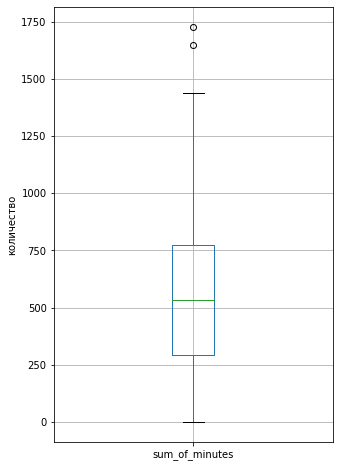

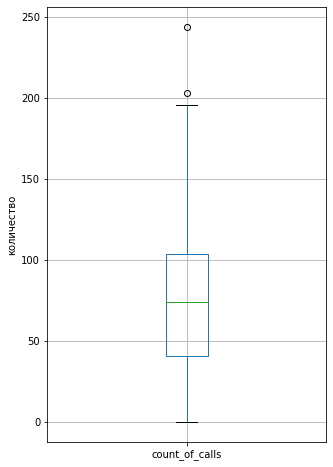

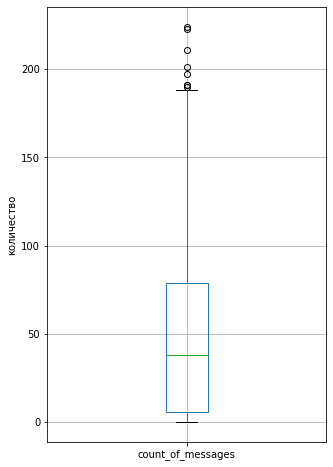

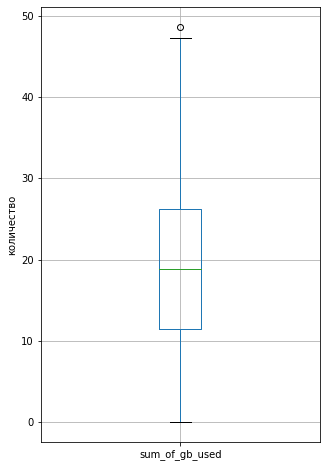

In [163]:
for param in parameters:
    
    ax = data_ultra.boxplot(column=param, figsize=(5,8));
    ax.set_ylabel('количество')
    
    plt.show()

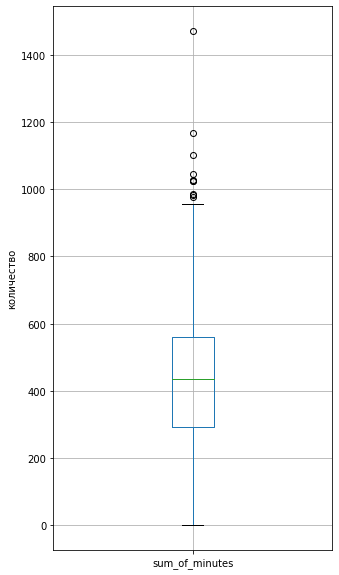

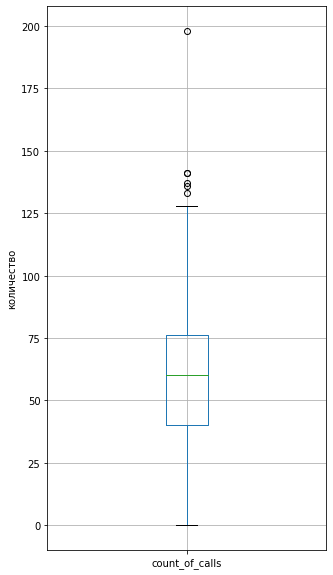

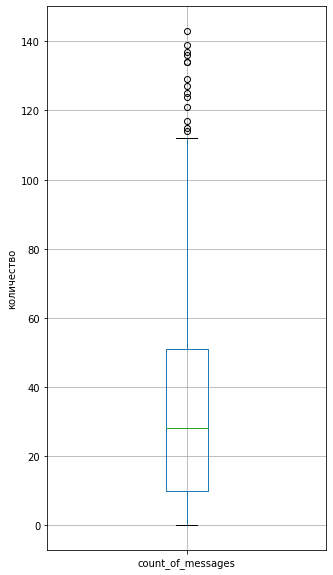

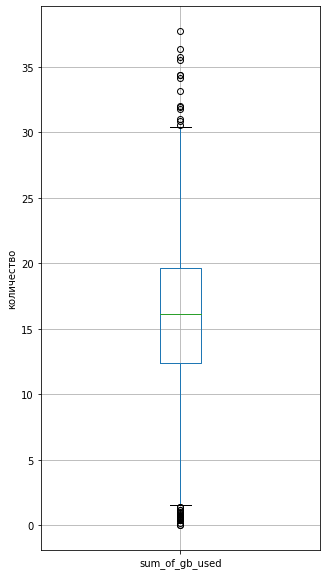

In [164]:
for param in parameters:
    
    ax = data_smart.boxplot(column=param, figsize=(5,10));
    ax.set_ylabel('количество')
    plt.show()

Мы видим что в каждом тарифе есть выбросы. Но стоит ли их удалять? Именно клиенты с большими тратами приносят компании наибольшую  среднюю выручку. Поэтому мы оставим такие значения.

### Вывод 2 шага:
1. Мы привели все данные в необходимый для анализа вид: 
  - заменили типы данных в столбцах с датами;
  - перевели все данные категориальных переменных в строчный регистр;
  - заменили звонки длительностью 0 минут и трафик размером 0 МБ на значения, равные единице;
  - перевели данные из МБ в ГБ.
2. Мы посчитали для каждого пользователя:
  - количество сделанных звонков и израсходованных минут разговора по месяцам;
  - количество отправленных сообщений по месяцам;
  - объем израсходованного интернет-трафика по месяцам;
  - помесячную выручку с каждого.
3. Мы нашли выбросы значений минут/сообщений/трафика для каждого тарифа и оставили их, так как именно клиенты с большими тратами приносят компании наибольшуюю среднюю выручку.

# Шаг 3. Анализ данных.

#### 1. Посчитаем, сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц.

In [165]:
for param in parameters:
    print('Среднее значение параметра', param, 'по месяцам')
    display(data_ultra.pivot_table(index='month', values=param).sort_values(by=param))
    print()
    print('Среднее значение параметра', param)
    display(data_ultra.pivot_table(index='month', values=param).describe().loc['mean'])
    print()

Среднее значение параметра sum_of_minutes по месяцам


,sum_of_minutes
month,
2.0,304.666667
1.0,440.888889
4.0,470.072727
6.0,492.428571
3.0,503.081081
8.0,524.570093
5.0,524.865672
9.0,553.643478
11.0,555.805970



Среднее значение параметра sum_of_minutes


sum_of_minutes    509.356551
Name: mean, dtype: float64


Среднее значение параметра count_of_calls по месяцам


,count_of_calls
month,
2.0,41.541667
1.0,59.444444
4.0,64.090909
6.0,66.738095
3.0,67.675676
8.0,71.289720
5.0,72.507463
9.0,74.600000
11.0,75.119403



Среднее значение параметра count_of_calls


count_of_calls    69.123177
Name: mean, dtype: float64


Среднее значение параметра count_of_messages по месяцам


,count_of_messages
month,
2.0,21.958333
4.0,31.563636
3.0,32.297297
1.0,33.777778
5.0,37.850746
6.0,41.726190
8.0,48.439252
7.0,49.846154
9.0,52.286957



Среднее значение параметра count_of_messages


count_of_messages    43.714983
Name: mean, dtype: float64


Среднее значение параметра sum_of_gb_used по месяцам


,sum_of_gb_used
month,
2.0,11.512044
1.0,12.846354
4.0,16.450444
3.0,17.142103
6.0,18.499930
9.0,18.773480
5.0,18.928900
8.0,19.136600
11.0,19.342897



Среднее значение параметра sum_of_gb_used


sum_of_gb_used    17.797341
Name: mean, dtype: float64

#### Вывод для пользователей тарифа "Ультра":
- В среднем пользователь тарифа разговаривает 509 минут по телефону в месяц. Больше всего пользователи говорят по телефону в декабре - в среднем 609 минут. Я полагаю, что это связано с Новым годом - обычно 31го декабря люди звонят своим родественникам и друзьям, чтобы поздравить их. Меньше всего пользователи говорили по телефону в феврале - 305 минут в среднем.
- В среднем пользователь тарифа делает в месяц 69 звонков. Больше всего - в декабре - 83, меньше всего - в феврале - 41.
- В среднем пользователь тарифа отправляет в месяц 44 сообщения. Больше всего - в декабре - 60 сообщений, меньше всего - в феврале - 22 сообщение. 
- В среднем пользователь тарифа тратит в месяц 17.8 гб трафика. Больше всего - в декабре - 21 гб, меньше всего - в феврале - 11 гб.
- В целом мы видим, что пользователи активнее всего себя ведут в декабре, в феврале же, наоборот, меньше всего звонят, отправляют сообщения и сидят в интернете. Причем разница значительная - примерно в 2 раза отличаются показатели по каждому из параметров. Также мы видим, что активность пользователей в первой половине года ниже, чем во второй половине.

In [166]:
for param in parameters:
    print('Среднее значение параметра', param, 'по месяцам')
    display(data_smart.pivot_table(index='month', values=param).sort_values(by=param))
    print('Среднее значение параметра', param)
    display(data_smart.pivot_table(index='month', values=param).describe().loc['mean'])
    print()

Среднее значение параметра sum_of_minutes по месяцам


,sum_of_minutes
month,
1.0,209.647059
2.0,306.310345
4.0,377.000000
5.0,398.404255
3.0,400.532468
6.0,406.701220
7.0,419.288557
8.0,433.191489
10.0,438.295918


Среднее значение параметра sum_of_minutes


sum_of_minutes    397.374228
Name: mean, dtype: float64


Среднее значение параметра count_of_calls по месяцам


,count_of_calls
month,
1.0,27.676471
2.0,40.189655
4.0,51.312500
3.0,54.324675
5.0,55.241135
6.0,55.548780
7.0,56.726368
8.0,58.978723
9.0,59.546154


Среднее значение параметра count_of_calls


count_of_calls    53.958072
Name: mean, dtype: float64


Среднее значение параметра count_of_messages по месяцам


,count_of_messages
month,
1.0,18.235294
2.0,24.086207
4.0,30.741071
3.0,31.857143
6.0,33.402439
8.0,33.638298
9.0,33.638462
7.0,33.751244
10.0,33.765306


Среднее значение параметра count_of_messages


count_of_messages    31.413211
Name: mean, dtype: float64


Среднее значение параметра sum_of_gb_used по месяцам


,sum_of_gb_used
month,
1.0,8.328699
2.0,11.345063
4.0,13.170000
3.0,14.776570
7.0,15.401756
6.0,15.451607
5.0,15.461672
9.0,15.949820
8.0,16.250208


Среднее значение параметра sum_of_gb_used


sum_of_gb_used    14.73155
Name: mean, dtype: float64

### Вывод для пользователей тарифа "Смарт":
- В среднем пользователь тарифа разговаривает 397 минут по телефону в месяц. Больше всего пользователи говорят по телефону в декабре - в среднем 491 минуту. Я полагаю, что это связано с Новым годом - обычно 31го декабря люди звонят своим родественникам и друзьям, чтобы поздравить их. Меньше всего пользователи говорили по телефону в январе - 209 минут в среднем.
- В среднем пользователь тарифа делает в месяц 54 звонка. Больше всего - в декабре - 66, меньше всего - в январе - 27.
- В среднем пользователь тарифа отправляет в месяц 31 сообщение. Больше всего - в декабре - 36 сообщения, меньше всего - в январе - 18 сообщений. 
- В среднем пользователь тарифа тратит в месяц 14.7 гб трафика. Больше всего - в декабре - 18 гб, меньше всего - в январе - 8 гб.
- В целом мы видим, что пользователи активнее всего себя ведут в декабре, в январе же, наоборот, меньше всего звонят, отправляют сообщения и сидят в интернете. Причем разница значительная - примерно в 2 раза отличаются показатели по каждому из параметров. Также мы видим, что активность пользователей в первой половине года ниже, чем во второй половине.

#### 2. Посчитаем среднее, дисперсию и стандартное отклонения для данных каждого тарифа по каждому из ключевых параметров.

In [167]:
print('Для пользователей тарифа "Ультра":')
for param in parameters:
    print()
    print('Среднее', param, ' для тарифа "Ультра" равно {:.2f}'.format(data_ultra[param].mean()))
    print('Среднее', param, 'для тарифа "Смарт" равно {:.2f}'.format(data_smart[param].mean()))
    print()
    print('Дисперсия', param, ' для тарифа "Ультра" равна {:.2f}'.format(np.var(data_ultra[param], ddof=1)))
    print('Дисперсия', param, 'для тарифа "Смарт" равна {:.2f}'.format(np.var(data_smart[param], ddof=1))) 
    print()
    print('Стандартное отклонение', param, ' для тарифа "Ультра" равно {:.2f}'.format(data_ultra[param].std())) 
    print('Стандартное отклонение', param, 'для тарифа "Смарт" равно {:.2f}'.format(data_smart[param].std()))

Для пользователей тарифа "Ультра":

Среднее sum_of_minutes  для тарифа "Ультра" равно 540.78
Среднее sum_of_minutes для тарифа "Смарт" равно 429.45

Дисперсия sum_of_minutes  для тарифа "Ультра" равна 106105.73
Дисперсия sum_of_minutes для тарифа "Смарт" равна 37974.77

Стандартное отклонение sum_of_minutes  для тарифа "Ультра" равно 325.74
Стандартное отклонение sum_of_minutes для тарифа "Смарт" равно 194.87

Среднее count_of_calls  для тарифа "Ультра" равно 73.39
Среднее count_of_calls для тарифа "Смарт" равно 58.46

Дисперсия count_of_calls  для тарифа "Ультра" равна 1928.69
Дисперсия count_of_calls для тарифа "Смарт" равна 672.88

Стандартное отклонение count_of_calls  для тарифа "Ультра" равно 43.92
Стандартное отклонение count_of_calls для тарифа "Смарт" равно 25.94

Среднее count_of_messages  для тарифа "Ультра" равно 49.36
Среднее count_of_messages для тарифа "Смарт" равно 33.38

Дисперсия count_of_messages  для тарифа "Ультра" равна 2285.27
Дисперсия count_of_messages для тари

Сведем все данные в одну одну таблицу. 

In [168]:
rows = []
columns = ['статистика', 'параметр','ультра', 'смарт']
for param in parameters:
    row = ['среднее', param, data_ultra[param].mean(), data_smart[param].mean()]
    rows.append(row)
tariffs_statistics =  pd.DataFrame(rows, columns=columns)
display(tariffs_statistics)

,статистика,параметр,ультра,смарт
0,среднее,sum_of_minutes,540.779695,429.450875
1,среднее,count_of_calls,73.392893,58.463437
2,среднее,count_of_messages,49.363452,33.384029
3,среднее,sum_of_gb_used,19.031937,15.856625


In [169]:
rows = []
columns = ['статистика', 'параметр','ультра', 'смарт']
for param in parameters:
    row = ['стандартное отклонение', param, data_ultra[param].std(), data_smart[param].std()]
    rows.append(row)
for row in rows:
    tariffs_statistics.loc[len(tariffs_statistics)] = row
display(tariffs_statistics)

,статистика,параметр,ультра,смарт
0,среднее,sum_of_minutes,540.779695,429.450875
1,среднее,count_of_calls,73.392893,58.463437
2,среднее,count_of_messages,49.363452,33.384029
3,среднее,sum_of_gb_used,19.031937,15.856625
4,стандартное отклонение,sum_of_minutes,325.738740,194.871174
5,стандартное отклонение,count_of_calls,43.916853,25.939858
6,стандартное отклонение,count_of_messages,47.804457,28.227876
7,стандартное отклонение,sum_of_gb_used,9.860457,5.741987


In [170]:
rows = []
columns = ['статистика', 'параметр','ультра', 'смарт']
for param in parameters:
    row = ['дисперсия', param, np.var(data_ultra[param], ddof=1), np.var(data_smart[param], ddof=1)]
    rows.append(row)
for row in rows:
    tariffs_statistics.loc[len(tariffs_statistics)] = row
display(tariffs_statistics)

,статистика,параметр,ультра,смарт
0,среднее,sum_of_minutes,540.779695,429.450875
1,среднее,count_of_calls,73.392893,58.463437
2,среднее,count_of_messages,49.363452,33.384029
3,среднее,sum_of_gb_used,19.031937,15.856625
4,стандартное отклонение,sum_of_minutes,325.738740,194.871174
5,стандартное отклонение,count_of_calls,43.916853,25.939858
6,стандартное отклонение,count_of_messages,47.804457,28.227876
7,стандартное отклонение,sum_of_gb_used,9.860457,5.741987
8,дисперсия,sum_of_minutes,106105.726823,37974.774628
9,дисперсия,count_of_calls,1928.689990,672.876243


#### Вывод:
дисперсия и стандартное отклонение для всех параметров тарифа "Ультра" больше дисперсии и стандартного отклонения тарифа "Смарт". Это говорит о том, что данные пользователей тарифа "Ультра" имеют больший диапазон значений.
Рассмотрим подробнее данные на графиках.

У нас уже есть список параметров для, по которым мы будем строить графики для каждого тарифа.
Создадим также список для наименования оси Х каждого графика, а также список для наименования каждого графика.

In [171]:
names = ['Сумма минут разговора', 
         'Количество звонков', 
         'Количество сообщений', 
         'Сумма трафика, ГБ']

In [172]:
titles = ['Гистограмма распределения среднего количества минут разговоров в месяц по двум тарифам',
          'Гистограмма распределения среднего количества звонков в месяц по двум тарифам',
          'Гистограмма распределения среднего количества сообщений в месяц по двум тарифам', 
          'Гистограмма распределения среднего количества интернет-трафика в месяц по двум тарифам']

#### 3. Построим гистограммы распределения по каждому параметру для каждого тарифа. Расположим для двух тарифов по каждому параметру на одной оси координат, чтобы наглядно увидеть разницу между поведением пользователей тарифов.

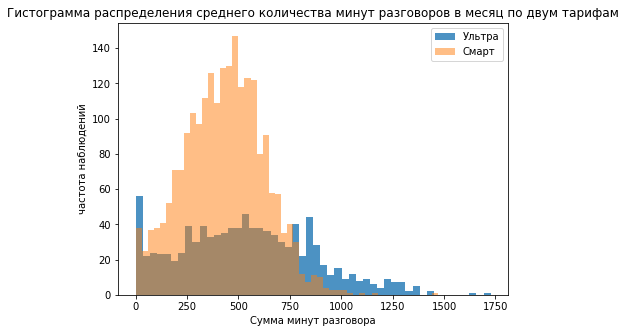

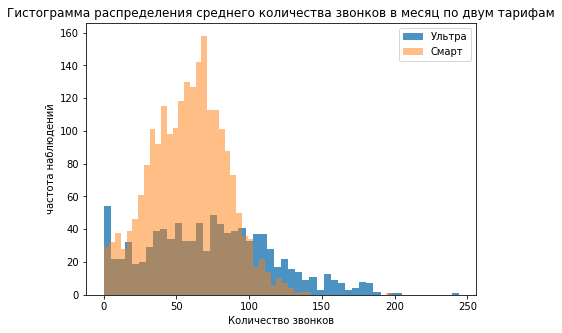

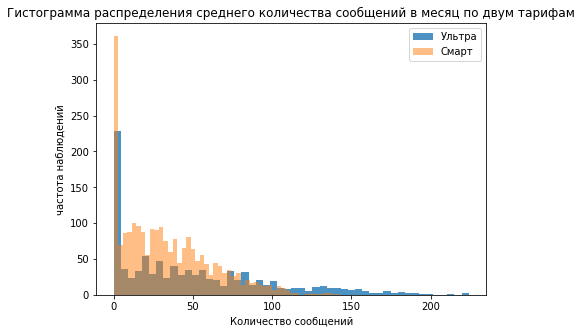

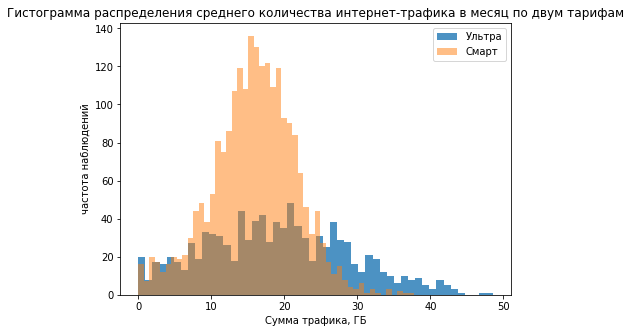

In [173]:
for param, name, title in zip(parameters, names, titles):
    fig=plt.figure()
    data_ultra[param].plot(kind='hist', alpha=0.8, bins=50, label='Ультра', figsize=(7,5))
    data_smart[param].plot(kind='hist', style='orange', alpha=0.5, bins=50, label='Смарт', figsize=(7,5))
    plt.legend()
    plt.xlabel(name)
    plt.ylabel('частота наблюдений')
    plt.title(title)

#### Вывод:
1. Распределения минут разговора, количества звонков и использованного трафика для тарифа "Смарт":
    - унимодальное;
    - симметричное;
    - предположительно нормальное.
2. Распределения минут разговора, количества звонков и использованного трафика для тарифа "Ультра":
    -  предположительно равномерное.
3. У пользователей обоих тарифов самое частое наблюдение в количестве отправленных сообщений - 0, а также тенденция к уменьшению частоты отправленных сообщений. Предположу, что причиной тому является переход пользователей в мессенджеры. 
4. Предположу, что тарифом "Ультра" в основном могут пользоваться:
  - корпоративные клиенты;
  - люди, которые используют телефон преимущественно в рабочих целях.
  
Такой вывод я сделала на основе распределения минут разговора, количества звонков и использованного трафика: для тарифа "Ультра" данные близки к равномерным, будто у них есть еще какой-то общий признак. А распределения минут разговора, количества звонков и использованного трафика для тарифа "Смарт", наоборот, очень похожи на нормальное, будто взяты данные совершенно случайных людей без каких-либо общих признаков. Также у тарифа "Ультра" выделяются нулевые значения по всем 4м параметрам. Возможно, это люди, у которых есть служебный номер, но они им не пользуются.

Кроме того, мы видим, что пользователи тарифа "Ультра" довольно часто говорят по телефону больше 800 минут в месяц, отправляют больше 100 сообщение и используют больше 30 гб интернет-трафика. Огромные показатели для обычного пользователя, поэтому снова возвращаюсь к предположению, о том, что тарифом "Ультра" могут пользоваться преимущественно в рабочих целях.

#### 4. Рассмотрю подробнее выручку от клиентов каждого тарифа.

Построю гистограмму распределения для выручки по каждому тарифу.

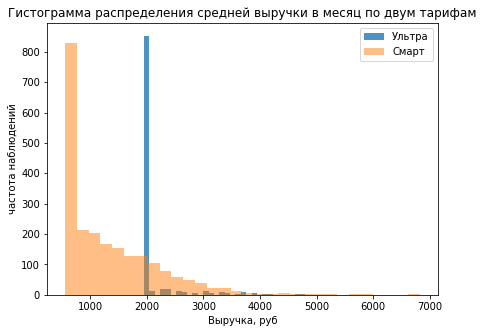

In [174]:
fig=plt.figure()
data_ultra['revenue'].plot(kind='hist', alpha=0.8, bins=30, label='Ультра', figsize=(7,5))
data_smart['revenue'].plot(kind='hist', style='orange', alpha=0.5, bins=30, label='Смарт', figsize=(7,5))
plt.legend()
plt.xlabel('Выручка, руб')
plt.ylabel('частота наблюдений')
plt.title('Гистограмма распределения средней выручки в месяц по двум тарифам');

Рассмотрю основные показатели выручки.

In [175]:
data_ultra['revenue'].describe()

count     986.000000
mean     2070.943205
std       378.629673
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
Name: revenue, dtype: float64

In [176]:
data_smart['revenue'].describe()

count    2230.000000
mean     1312.170404
std       830.908617
min       550.000000
25%       553.000000
50%      1075.000000
75%      1756.250000
max      6824.000000
Name: revenue, dtype: float64

In [177]:
len(data_ultra.query('revenue > rub_monthly_fee')) / len(data_ultra)

0.1359026369168357

In [178]:
len(data_smart.query('revenue > rub_monthly_fee')) / len(data_smart)

0.7515695067264574

#### Вывод:
1. Средняя выручка пользователей тарифа "Ультра" больше, чем выручка пользователей тарифа "Смарт" - 1950 против 1075.
2. Пользователи тарифа "Ультра" реже выходят за лимит тарифа, нежели пользователи тарифа "Смарт": для тарифа "Ультра" таких пользователей 14%, для "Смарт" - 75%.

#### Вывод 3 шага:
1. В среднем пользователи тарифа "Ультра" больше раговаривают по телефону, отправляют сообщения и используют больше интернет-трафика.
2. Клиенты обоих тарифов активнее всего пользуются услугами связи в декабре, меньше всего - в феврале (клиенты тарифа "Ультра") и в январе (пользователи тарифа "Смарт").
3. Во второй половине года пользователи обоих тарифов активнее используют услуги связи, нежели в первой половине года.
4. В среднем пользователь тарифа "Ультра":
  - разговаривает 509 минут по телефону в месяц;
  - совершает 69 звонков в месяц;
  - отправляет 44 сообщения в месяц;
  - тратит 17.8 гб трафика в месяц.
5. В среднем пользователь тарифа "Смарт":
  - разговаривает 397 минут по телефону в месяц;
  - совершает 54 звонка в месяц;
  - отправляет 31 сообщения в месяц;
  - тратит 14.7 гб трафика в месяц.
6. У пользователей обоих тарифов самое частое наблюдение в количестве отправленных сообщений - 0, а также тенденция к уменьшению частоты отправленных сообщений.
7. Предположительно пользователями тарифа "Ультра" являются корпоративные клиенты, а также люди, пользующиеся телефоном преимущественно в рабочих целях;
8. Средняя выручка пользователей тарифа "Ультра" больше, чем выручка пользователей тарифа "Смарт" - 1950 против 1075
9. Пользователи тарифа "Ультра" реже выходят за лимит тарифа, нежели пользователи тарифа "Смарт": для тарифа "Ультра" таких пользователей 14%, для "Смарт" - 75%.
10. Выручка пользователей тарифа "Ультра" почти в 2 раза больше выручки пользователей тарифа "Смарт". При этом, разница в использованных минутах/сообщениях/трафика примерно 25-30%. То есть, предположительно, и прибыль от тарифа "Ультра" выше.

# Шаг 4. Проверка гипотез.

1. Проверим гипотезу "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается".

Так как нулевая гипотеза всегда формулируется так, чтобы использовать знак равенства, нулевая и альтернативная гипотезы будут выглядеть следующим образом:
- 𝐻0: Средняя выручка пользователей тарифов «Ультра» и «Смарт» равна
- 𝐻1: Средняя выручка пользователей тарифов «Ультра» и «Смарт» не равна

Значение альфа задам равное 0.05, то есть нулевая гипотеза отвергается при значении p-value <  𝛼=0.05. Используем критерий Стьюдента для сравнения средних значений каждой из выборок, так как эти выборки независимы друг от друга.

In [179]:
alpha = 0.05
result = st.ttest_ind(data_ultra['revenue'], data_smart['revenue'])
print('p-значение:', result.pvalue)

if (result.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.014178407919692e-149
Отвергаем нулевую гипотезу


Результат: мы отвергаем нулевую гипотезу, заключающуюся в том, что  средняя выручка пользователей тарифов «Ультра» и «Смарт» равна.

2. Проверим гипотезу "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов".

Так как нулевая гипотеза всегда формулируется так, чтобы использовать знак равенства, нулевая и альтернативная гипотезы будут выглядеть следующим образом: 
- 𝐻0: Средняя выручка пользователей из Москвы и пользователей из других регионов равна 
- 𝐻1: Средняя выручка пользователей из Москвы и пользователей из других регионов не равна

Значение альфа задам равное 0.05, то есть нулевая гипотеза отвергается при значении p-value < 𝛼=0.05. Используем критерий Стьюдента для сравнения средних значений каждой из выборок, так как эти выборки независимы друг от друга.

In [180]:
alpha = 0.05
result_2 = st.ttest_ind(general_data[general_data['city'] == 'москва']['revenue'],
                      general_data[general_data['city'] != 'москва']['revenue'])
print('p-значение:', result_2.pvalue)

if (result_2.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5746021529115002
Не получилось отвергнуть нулевую гипотезу


В результате, нам не удалось опровергнуть нулевую гипотезу, заключающуюся в том, что средняя выручка пользователей из Москвы и пользователей из других регионов равна.

#### Вывод 4 шага:
С помощью критерия Стюдента мы сравнили средние значения выручки тарифов "Ультра" и "Смарт" и пришли к следующим выводам:
1. Мы отвергли гипотезу заключающуюся в том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» равна;
2. Мы не отвергли гипотезу, заключающуюся в том, что средняя выручка пользователей из Москвы и пользователей из других регионов равна.

# Общий вывод

### I. Чистота данных.
Из всех датасетов пропуски были обнаружены только в одном столбце - дата окончания пользованием тарифа. Эти пропуски логичны, так как некоторые пользователи на момент выгрузки данных продолжади пользоваться тарифом.

### II. Посчитанные значения.

Мы посчитали для каждого пользователя:
  - количество сделанных звонков и израсходованных минут разговора по месяцам;
  - количество отправленных сообщений по месяцам;
  - объем израсходованного интернет-трафика по месяцам;
  - помесячную выручку.
  
### III. Сравнительный анализ клиентов двух тарифов.

1. В среднем пользователи тарифа "Ультра" больше раговаривают по телефону, отправляют сообщения и используют больше интернет-трафика.
2. Клиенты обоих тарифов активнее всего пользуются услугами связи в декабре, меньше всего - в феврале (клиенты тарифа "Ультра") и в январе (пользователи тарифа "Смарт").
3. Во второй половине года пользователи обоих тарифов активнее используют услуги связи, нежели в первой половине года.
4. В среднем пользователь тарифа "Ультра":
  - разговаривает 508 минут по телефону в месяц;
  - совершает 68 звонка в месяц;
  - отправляет 42 сообщения в месяц;
  - тратит 17.7 гб трафика в месяц.
5. В среднем пользователь тарифа "Смарт":
  - разговаривает 401 минут по телефону в месяц;
  - совершает 54 звонка в месяц;
  - отправляет 31 сообщения в месяц;
  - тратит 14.9 гб трафика в месяц.
6. У пользователей обоих тарифов самое частое наблюдение в количестве отправленных сообщений - 0, а также тенденция к уменьшению частоты отправленных сообщений.
7. Предположительно пользователями тарифа "Ультра" являются корпоративные клиенты, а также люди, пользующиеся телефоном преимущественно в рабочих целях;
8. Средняя выручка пользователей тарифа "Ультра" больше, чем выручка пользователей тарифа "Смарт" - 1950 против 1075
9. Пользователи тарифа "Ультра" реже выходят за лимит тарифа, нежели пользователи тарифа "Смарт": для тарифа "Ультра" таких пользователей 14%, для "Смарт" - 75%.
10. Выручка пользователей тарифа "Ультра" почти в 2 раза больше выручки пользователей тарифа "Смарт". При этом, разница в использованных минутах/сообщениях/трафика примерно 25-30%. То есть, предположительно, и прибыль от тарифа "Ультра" выше.

### IV. Проверка гипотез.

С помощью критерия Стюдента мы сравнили средние значения выручки тарифов "Ультра" и "Смарт" и пришли к следующим выводам:
1. Мы отвергли гипотезу заключающуюся в том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» равна;
2. Мы не отвергли гипотезу, заключающуюся в том, что средняя выручка пользователей из Москвы и пользователей из других регионов равна.

### V.  Рекомендации на основе проведенного анализа.

1. Скорректировать рекламный бюджет в пользу тарифа "Ультра", так как он приносит компании больше денег;
2. При проведении рекламной кампании тарифа "Ультра" ориентироваться на корпоративных пользователей и людей, использующих телефон преимущественно в рабочих целях.